In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

In [2]:
df = pd.read_csv("Data_Mining_Pro/Students_Grading_Dataset.csv")

In [3]:
df.head(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
df['Attendance (%)'].fillna(df['Attendance (%)'].mean(), inplace=True)

In [6]:
df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [8]:
df.drop(columns=['Parent_Education_Level'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [10]:
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [12]:
df = pd.get_dummies(df, columns=['Gender', 'Department', 'Extracurricular_Activities', 
                                 'Internet_Access_at_Home', 'Family_Income_Level', 'Grade'], drop_first=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5000 non-null   int64  
 1   Attendance (%)                  5000 non-null   float64
 2   Midterm_Score                   5000 non-null   float64
 3   Final_Score                     5000 non-null   float64
 4   Assignments_Avg                 5000 non-null   float64
 5   Quizzes_Avg                     5000 non-null   float64
 6   Participation_Score             5000 non-null   float64
 7   Projects_Score                  5000 non-null   float64
 8   Total_Score                     5000 non-null   float64
 9   Study_Hours_per_Week            5000 non-null   float64
 10  Stress_Level (1-10)             5000 non-null   int64  
 11  Sleep_Hours_per_Night           5000 non-null   float64
 12  Gender_Male                     50

In [14]:
scaler = StandardScaler()
num_cols = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg',
            'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 
            'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
print(df.head()) 

   Age  Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
0   22       -1.700434      -0.888758    -0.685779     6.904670e-01   
1   18        1.604703       1.563093    -1.383115     1.041480e-15   
2   24       -1.340381      -0.190387     1.394627    -5.202451e-01   
3   24        1.448925      -1.309407     0.637535    -6.404369e-01   
4   23       -1.561556      -1.379128     0.536590     1.616090e+00   

   Quizzes_Avg  Participation_Score  Projects_Score  Total_Score  \
0    -0.058659            -0.342587        0.761001    -1.321791   
1     1.332793             1.155762       -1.336493    -1.700302   
2     0.743943             0.024214       -0.078690    -0.334882   
3     1.282458             0.539813        1.192288    -0.937028   
4     0.606038             0.342570       -0.451038    -0.624496   

   Study_Hours_per_Week  ...  Department_Engineering  Department_Mathematics  \
0             -1.575071  ...                    True                   False   
1   

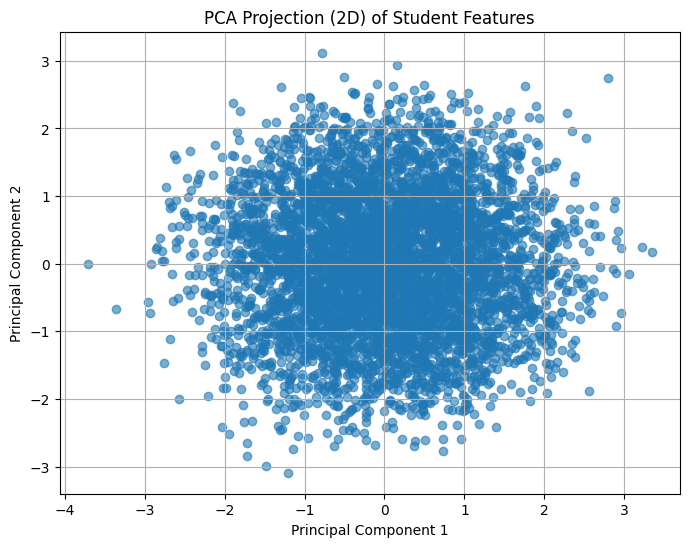

Explained variance by each component:
[0.09811728 0.09488674]


In [16]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[num_cols])


pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title("PCA Projection (2D) of Student Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


print("Explained variance by each component:")
print(pca.explained_variance_ratio_)

Accuracy: 0.3253333333333333


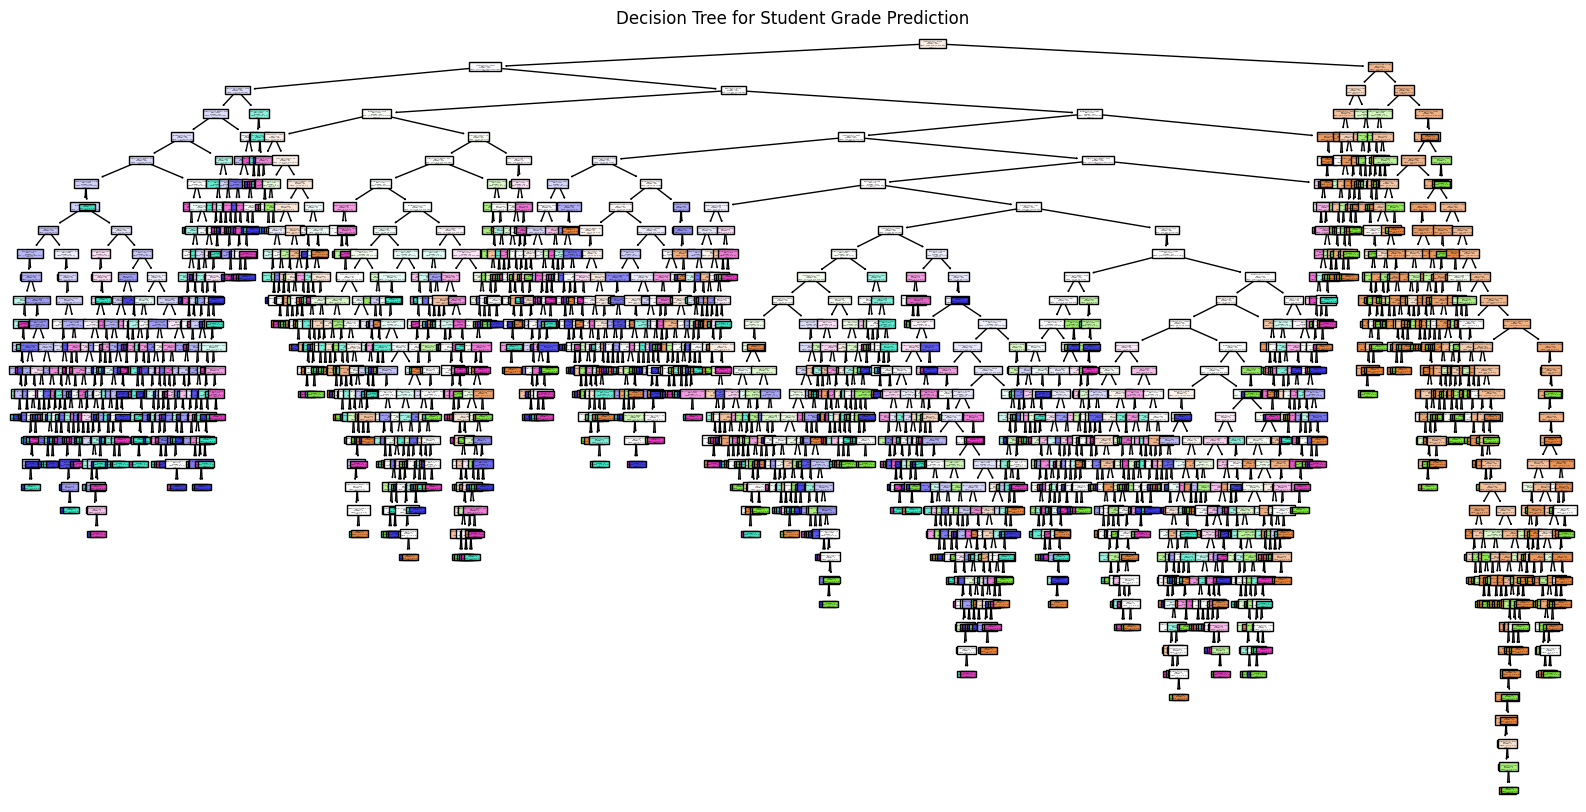

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

df = pd.read_csv('Students_Grading_Dataset.csv')

# Clean the column names (important!)
df.columns = df.columns.str.strip()

# Select Features and Target
features = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Projects_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
X = df[features]
y = df['Grade']  # Now it should work ✅

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Classifier
clf = clf.fit(X_train, y_train)

# Predict the Test set results
y_pred = clf.predict(X_test)

# Evaluate Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=clf.classes_)
plt.title("Decision Tree for Student Grade Prediction")
plt.show()
